In [1]:
from os.path import isfile
import numpy as np

import src.Models as mp
import src.Util as ut

from src.modules.AMOGAPE import AMOGAPE

/Users/muszynski/opt/anaconda3/envs/gp_emu_test/lib/python3.10/site-packages/pyrcel/constants.py:70: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  std_atm = pd.read_csv(_std_atm_fn, delim_whitespace=True)
/Users/muszynski/opt/anaconda3/envs/gp_emu_test/lib/python3.10/site-packages/pyrcel/_parcel_aux_numba.py:3: NumbaPendingDeprecationWarning: The 'pycc' module is pending deprecation. Replacement technology is being developed.

Pending Deprecation in Numba 0.57.0. For more information please see: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-the-numba-pycc-module
  from numba.pycc import CC


In [2]:
exp_id = 28
n_samples = 2

#lims = np.array([[0.5,6],[800,1000], [0.20, 0.90]])
#lims = np.array([[1,6],[800,1000], [20, 30]])
lims = np.array([[1,6],[800,1000]])

exp_name = ut.get_simple_file_name(exp_id, n_samples)

if isfile('data/' + exp_name):
    Xt, Yt = ut.load_data(exp_name)
    print('loaded data...', Xt.shape, Yt.shape)
else:
    Xt = ut.lhs_generate_input_data(lims, n_samples, dim=2)
    print(Xt)
    Yt = mp.pyrcel_model(Xt)
    np.savez('data/' + exp_name, Xt, Yt)
    print('generated data...', Xt.shape, Yt.shape)

exp_28_XY_2_data_.npz
[[  3.19512316 896.54616252]
 [  5.2222842  942.96741948]]
model input size: (2, 2)
X [[  3.19512316 896.54616252]
 [  5.2222842  942.96741948]]
x1,x2,x3: [  3.19512316 896.54616252]


/Users/muszynski/opt/anaconda3/envs/gp_emu_test/lib/python3.10/site-packages/pyrcel/integrator.py:30: UserWarning: Could not import odespy package; invoking the 'lsoda' or 'lsode' options will fail!
  warnings.warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


x1,x2,x3: [  5.2222842  942.96741948]
(2, 1)
generated data... (2, 2) (2, 1)


In [3]:
# Input dimension
D=2
#Output dimension
P=1

#means=np.array([3.5,940]); stdevs=np.array([1.5,855])
means=np.array([np.mean(Xt[:,0]),np.mean(Xt[:,1])]); stdevs=np.array([np.std(Xt[:,0]),np.std(Xt[:,1])])
#means=np.array([np.mean(Xt[:,0]),np.mean(Xt[:,1]), np.mean(Xt[:,2])]); stdevs=np.array([np.std(Xt[:,0]),np.std(Xt[:,1]), np.mean(Xt[:,2])])

print(means, stdevs)

startdata={}
startdata['X']=Xt
startdata['Y']=Yt #*1000 # I need to scale this and the output of model(x), but I forgot to do that.

amo = AMOGAPE(mp.model, D=D, P=P, means=means, stdevs=stdevs, inputlimits=lims, startdata=startdata)
#acq = amo.A_add_D_add_G
acq = amo.A_prod_D_prod_G

[  4.20870368 919.756791  ] [ 1.01358052 23.21062848]


In [4]:
limitscale = 1.0
for run in range(5):    
    # Update
    new = amo.update(limitscale, acq)
    print( amo.emudict['emu0'].likelihood_variance )
    print('RMSE: ',amo.test(Xt,Yt))

LIM: [[0.]
 [0.]]
negA <function AMOGAPE.update.<locals>.<lambda> at 0x7fb275ca2440>
sol x: [  4.49418988 939.76759509]
model input size: (1, 2)
X [[  4.49418988 939.76759509]]
model output size (1, 1)
DIV: 0.8826980759441605
GEO: 0.004757336664927886
{3: {'G': 0.004757336664927886, 'D': 0.8826980759441605, 'lengthscale': [1.5640527359240448], 'likelihood_sigma': [0.020188646630663852]}}
0.020188646630663852
RMSE:  8.157760168518457e-05
LIM: [[0.]
 [0.]]
negA <function AMOGAPE.update.<locals>.<lambda> at 0x7fb261020430>
sol x: [  5.43688942 908.60839741]
model input size: (1, 2)
X [[  5.43688942 908.60839741]]
model output size (1, 1)
DIV: 0.6714010095324171
GEO: 0.001095047171204522
{3: {'G': 0.004757336664927886, 'D': 0.8826980759441605, 'lengthscale': [1.5640527359240448], 'likelihood_sigma': [0.020188646630663852]}, 4: {'G': 0.001095047171204522, 'D': 0.6714010095324171, 'lengthscale': [1.477142211008093], 'likelihood_sigma': [1e-09]}}
1e-09
RMSE:  6.124311786941706e-12
LIM: [[0.]


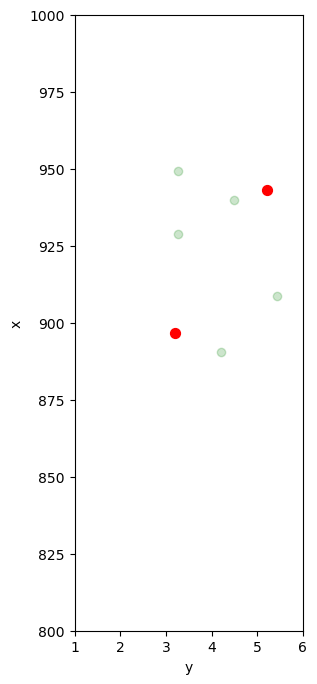

LIM: [[0.]
 [0.]]
negA <function AMOGAPE.update.<locals>.<lambda> at 0x7fb2507ecf70>
sol x: [  1.76311694 909.92504607]
model input size: (1, 2)
X [[  1.76311694 909.92504607]]
model output size (1, 1)
DIV: 0.08202918233726564
GEO: 0.0006808502272823029
{3: {'G': 0.004757336664927886, 'D': 0.8826980759441605, 'lengthscale': [1.5640527359240448], 'likelihood_sigma': [0.020188646630663852]}, 4: {'G': 0.001095047171204522, 'D': 0.6714010095324171, 'lengthscale': [1.477142211008093], 'likelihood_sigma': [1e-09]}, 5: {'G': 0.0016997565364863, 'D': 0.3405860760077828, 'lengthscale': [2.056100130234354], 'likelihood_sigma': [1e-09]}, 6: {'G': 0.0010196115966578949, 'D': 0.13606835448400445, 'lengthscale': [2.3776654416112364], 'likelihood_sigma': [1e-09]}, 7: {'G': 0.0006544109356251508, 'D': 0.03705243068595432, 'lengthscale': [2.7068340551061087], 'likelihood_sigma': [1e-09]}, 8: {'G': 0.0006808502272823029, 'D': 0.08202918233726564, 'lengthscale': [2.5985612021515734], 'likelihood_sigma': 

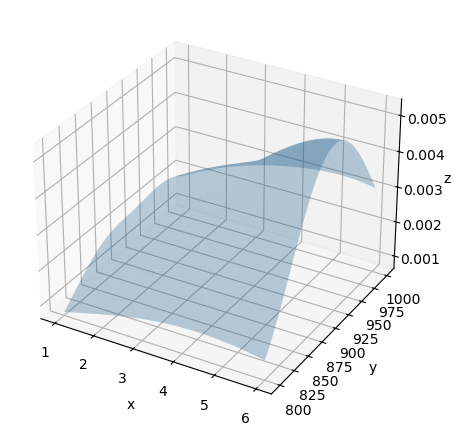

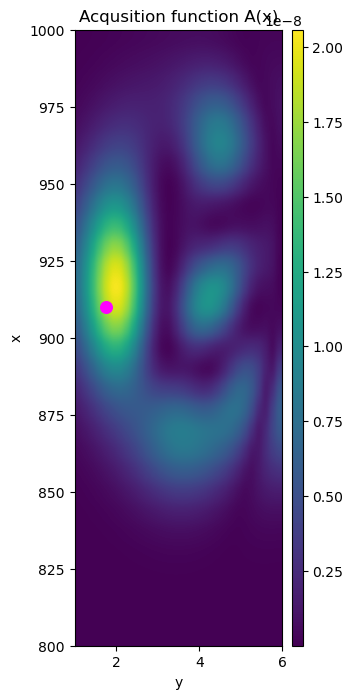

In [5]:
mp.plot_inputs(Xt, amo, lims)
mp.plot_fit(amo, lims)
mp.plot_acq_func(Xt, Yt, amo, acq, lims, limitscale)